In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import numpy as np
import warnings
from optimize_full_year import optimize
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


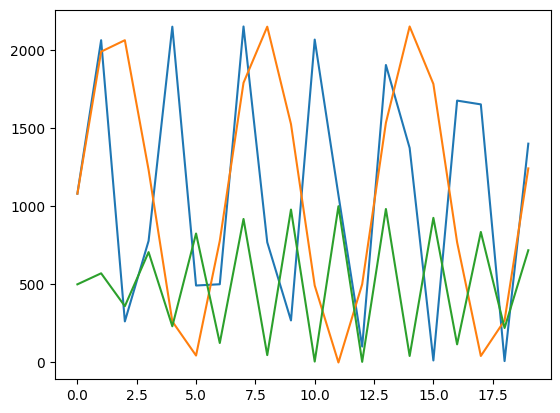

In [3]:
T = 20
time = np.arange(0, T, 1)


solar = 1080*(np.sin(2*time) + 1)
wind = 1080*(np.sin(time) + 1)
battery = 500*(np.sin(3*time) + 1)


plt.plot(solar)
plt.plot(wind)
plt.plot(battery)

renewable_powers = pd.DataFrame()
renewable_powers["solar"] = solar
renewable_powers["wind"] = wind
renewable_powers["battery"] = battery






In [12]:
model = optimize(
    T, renewable_powers, battery_storage_hours=2, stack_life_hrs=80000, cost_year=2025
)


    model.name="unknown";
      - termination condition: infeasible
      - message from solver: <undefined>


In [14]:
model.solar_size_mw[0].value

10